In [1]:
import rmgpy
import numpy as np
from rmgpy.molecule.molecule import *
from rmgpy.species import *
from rmgpy.chemkin import *
from rmgpy.data.rmg import RMGDatabase
from IPython.display import display
from rmgpy.data.thermo import ThermoLibrary
from rmgpy.rmg.react import react
from rmgpy.species import Species
from rmgpy.reaction import Reaction
from rmgpy.data.rmg import get_db
from rmgpy.molecule.group import Group
from rmgpy.kinetics.arrhenius import ArrheniusBM
from rmgpy import settings
import time
import matplotlib.pyplot as plt
import matplotlib

In [2]:
settings

{'database.directory': '/home/khalil.nor/Code/RMG-database/input',
 'test_data.directory': '/home/khalil.nor/Code/RMG-Py/rmgpy/test_data'}

In [3]:
thermo_libs = [
'C1_C2_Fluorine', #adding Siddha's as first most trusted because this is the thermo library that Franklin used
'PFCA_thermo',
'NCSU_C2_C8_PFAS', #adding Westmoreland's thermo as the second most trusted
'primaryThermoLibrary',
'Fluorine',
'FFCM1(-)',
'halogens',
'CHOF_G4',
'CHOCl_G4',
'CHOBr_G4',
'CHOFCl_G4',
'CHOFBr_G4',
'CHOFClBr_G4',
'DFT_QCI_thermo',
'2-BTP_G4',
'thermo_DFT_CCSDTF12_BAC',
'SulfurHaynes'
]

kin_families = ['PFAS_Hydrolysis']


In [4]:
database = RMGDatabase()
database.load(
            path = settings['database.directory'],
            thermo_libraries = thermo_libs,
            transport_libraries = [],
            reaction_libraries = [],
            seed_mechanisms = [],#['BurkeH2O2inN2','ERC-FoundationFuelv0.9'],
            kinetics_families = kin_families,
            kinetics_depositories = ['training'],
            #frequenciesLibraries = self.statmechLibraries,
            depository = False, # Don't bother loading the depository information, as we don't use it
        )


testing
testing
testing
testing


In [5]:
database.kinetics.families

{'PFAS_Hydrolysis': <ReactionFamily "PFAS_Hydrolysis">}

In [6]:
# 'PFAS_Hydrolysis' 
family_to_train = "PFAS_Hydrolysis"
family = database.kinetics.families[family_to_train]

In [7]:
family.clean_tree()

In [8]:
start = time.time()
family.generate_tree(thermo_database=database.thermo,
                     nprocs=1,
                     new_fraction_threshold_to_reopt_node=0.25,
                     max_batch_size=800,
                     extension_iter_max=2,
                     extension_iter_item_cap=100)

end = time.time()
print(end-start)

testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing


ERROR:root:18.0


testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing


ERROR:root:iter_max achieved terminating early
ERROR:root:iter_max achieved terminating early
ERROR:root:iter_max achieved terminating early


181.52046728134155


In [9]:
len(family.groups.entries)

30

In [10]:
family.groups.entries

{'HF': <Entry index=-1 label="HF">,
 'OH_C_R': <Entry index=-1 label="OH_C_R">,
 'Root': <Entry index=0 label="Root">,
 'Root_3F1sH->F1s': <Entry index=1 label="Root_3F1sH->F1s">,
 'Root_N-3F1sH->F1s': <Entry index=2 label="Root_N-3F1sH->F1s">,
 'Root_3F1sH->F1s_4R->F': <Entry index=3 label="Root_3F1sH->F1s_4R->F">,
 'Root_3F1sH->F1s_N-4R->F': <Entry index=4 label="Root_3F1sH->F1s_N-4R->F">,
 'Root_N-3F1sH->F1s_4R->H': <Entry index=5 label="Root_N-3F1sH->F1s_4R->H">,
 'Root_N-3F1sH->F1s_N-4R->H': <Entry index=6 label="Root_N-3F1sH->F1s_N-4R->H">,
 'Root_3F1sH->F1s_4R->F_Ext-1C-R_Ext-1C-R': <Entry index=7 label="Root_3F1sH->F1s_4R->F_Ext-1C-R_Ext-1C-R">,
 'Root_3F1sH->F1s_N-4R->F_4CH->H': <Entry index=8 label="Root_3F1sH->F1s_N-4R->F_4CH->H">,
 'Root_3F1sH->F1s_N-4R->F_N-4CH->H': <Entry index=9 label="Root_3F1sH->F1s_N-4R->F_N-4CH->H">,
 'Root_N-3F1sH->F1s_4R->H_Ext-1C-R': <Entry index=10 label="Root_N-3F1sH->F1s_4R->H_Ext-1C-R">,
 'Root_N-3F1sH->F1s_N-4R->H_Ext-4CF-R': <Entry index=11 

In [11]:
start = time.time()
family.check_tree()
end = time.time()
print(end-start)

0.0037491321563720703


In [12]:
start = time.time()
family.regularize(thermo_database=database.thermo)
end = time.time()
print(end-start)

testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
0.2794339656829834


In [13]:
start = time.time()
templateRxnMap = family.get_reaction_matches(thermo_database=database.thermo,remove_degeneracy=True,
                                             get_reverse=True,exact_matches_only=False,fix_labels=True)
end = time.time()
print(end-start)

testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
0.24984216690063477


In [14]:
len(templateRxnMap)

30

In [15]:
family.clean_tree_rules()

In [16]:
start = time.time()
family.make_bm_rules_from_template_rxn_map(templateRxnMap)#,nprocs=6)
end = time.time()
print(end-start)

/home/khalil.nor/Code/RMG-Py/rmgpy/data/kinetics/family.py:3624: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  for rxns, label in rxnlists])


position 1, 0.0
term 1: 131107.73200000002, term 2: 6677.482236003969
position 2: 137785.214236004
position 3: 137785.214236004
position 4: 137785.214236004
position 6: 144114.12732408463
position 9: 144114.12732408463
position 10: 144114.12732408463
position 1, 0.0
term 1: 127327.90639999996, term 2: 9115.071061171358
position 2: 136442.97746117134
term 1: 128990.20960000002, term 2: 9405.230768883717
position 2: 274838.41783005506
term 1: 130288.0864, term 2: 11012.516630129598
position 2: 416139.0208601847
position 3: 138713.00695339488
position 4: 138713.00695339488
position 6: 147622.26442701073
position 9: 147622.26442701073
position 10: 147622.26442701073
position 1, 0.0
term 1: 128990.20960000002, term 2: 9405.230768883717
position 2: 138395.44036888372
term 1: 130288.0864, term 2: 11012.516630129598
position 2: 279696.04339901335
position 3: 139848.02169950667
position 4: 139848.02169950667
position 6: 149129.68101805012
position 9: 149129.68101805012
position 10: 149129.68101

/work/westgroup/nora/miniconda/envs/rmg_env/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/work/westgroup/nora/miniconda/envs/rmg_env/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


position 1, 0.0
term 1: 127327.90639999996, term 2: 9115.071061171358
position 2: 136442.97746117134
term 1: 128990.20960000002, term 2: 9405.230768883717
position 2: 274838.41783005506
term 1: 130288.0864, term 2: 11012.516630129598
position 2: 416139.0208601847
term 1: 129244.59680000001, term 2: 5776.829912874193
position 2: 551160.4475730589
position 3: 137790.11189326472
position 4: 137790.11189326472
position 6: 145220.52003593845
position 9: 145220.52003593845
position 10: 145220.52003593845
position 1, 0.0
term 1: 128990.20960000002, term 2: 9405.230768883717
position 2: 138395.44036888372
term 1: 130288.0864, term 2: 11012.516630129598
position 2: 279696.04339901335
term 1: 129244.59680000001, term 2: 5776.829912874193
position 2: 414717.47011188755
position 3: 138239.1567039625
position 4: 138239.1567039625
position 6: 145323.97017987497
position 9: 145323.97017987497
position 10: 145323.97017987497
position 1, 0.0
term 1: 127327.90639999996, term 2: 9115.071061171358
positio

/work/westgroup/nora/miniconda/envs/rmg_env/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


position 6: -211037.07834231417
position 9: -211037.07834231417
position 10: -211037.07834231417
position 1, 0.0
term 1: 130288.0864, term 2: 11012.516630129598
position 2: 141300.6030301296
position 3: 141300.6030301296
position 4: 141300.6030301296
position 6: 151407.2504287101
position 9: 151407.2504287101
position 10: 151407.2504287101
position 1, 0.0
term 1: 244582.4144, term 2: 7024.739918522406
position 2: 251607.15431852243
term 1: 468616.368, term 2: -28871.165043608453
position 2: 691352.3572749139
term 1: 450696.29600000003, term 2: -22681.54220485236
position 2: 1119367.1110700616
term 1: 448650.32, term 2: -22319.415316733677
position 2: 1545698.0157533279
position 3: 386424.50393833197
position 4: 386424.50393833197
position 6: 360676.69877649547
position 9: 360676.69877649547
position 10: 360676.69877649547
position 1, 0.0
term 1: 468616.368, term 2: -28871.165043608453
position 2: 439745.20295639156
term 1: 450696.29600000003, term 2: -22681.54220485236
position 2: 8677

/work/westgroup/nora/miniconda/envs/rmg_env/lib/python3.7/site-packages/scipy/optimize/minpack.py:488: RuntimeWarning: divide by zero encountered in log
  return transform * (func(xdata, *params) - ydata)


position 6: 447231.67477184394
position 9: 447231.67477184394
position 10: 447231.67477184394
position 1, 0.0
term 1: 241309.6896, term 2: -102194.28762630584
position 2: 139115.40197369416
position 3: 139115.40197369416
position 4: 139115.40197369416
position 6: -211037.07834231417
position 9: -211037.07834231417
position 10: -211037.07834231417
position 1, 0.0
term 1: 245392.4368, term 2: 5999.944640655303
position 2: 251392.3814406553
position 3: 251392.3814406553
position 4: 251392.3814406553
position 6: 257226.62230617067
position 9: 257226.62230617067
position 10: 257226.62230617067
position 1, 0.0
term 1: 128990.20960000002, term 2: 9405.230768883717
position 2: 138395.44036888372
term 1: 130288.0864, term 2: 11012.516630129598
position 2: 279696.04339901335
position 3: 139848.02169950667
position 4: 139848.02169950667
position 6: 149129.68101805012
position 9: 149129.68101805012
position 10: 149129.68101805012
position 1, 0.0
term 1: 130288.0864, term 2: 11012.516630129598
posi

In [17]:
start = time.time()
family.check_tree()
end = time.time()
print(end-start)

0.004738569259643555


In [18]:
start = time.time()
errors,uncertainties = family.cross_validate(iters=0,random_state=5,folds=0,ascend=False)
end = time.time()
print(end-start)

testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
position 1, 0.0
term 1: 336006.99840000004, term 2: -3405.2368131876574
position 2: 332601.7615868124
term 1: 360945.31200000003, term 2: 1902.1316512651101
position 2: 695449.2052380776
position 3: 347724.6026190388
position 4: 347724.6026190388
position 6: 346968.9679644877
position 9: 346968.9679644877
position 10: 346968.9679644877
position 1, 0.0
term 1: 334335.4903999999, term 2: 3155.6132168461336
position 2: 337491.103616846
term 1: 336006.99840000004, term 2: -3405.2368131876574
position 2: 670092.8652036584
position 3: 335046.4326018292
position 4: 335046.4326018292
position 6: 334888.5471515898
position 9: 334888.5471515898
position 10: 334888.5471515898
position 1, 0.0
term 1: 241309.6896, term 2: -102194.28762630584
posit

In [19]:
save_path = os.path.join(settings['database.directory'], 'kinetics', 'families', family.name)
print(save_path)

/home/khalil.nor/Code/RMG-database/input/kinetics/families/PFAS_Hydrolysis


In [20]:
family.save(save_path)

In [21]:
#also save to this folder 
save_here = '.'
family.save(save_here)

In [ ]:
# notebook ran to completion for third retraining on Sep 18th 2024, 3:07 pm

In [ ]:
#let's check to see what the fit is like at the end nodes

In [22]:
from rmgpy.kinetics.uncertainties import RateUncertainty
import rmgpy
import numpy as np
from rmgpy.molecule.molecule import *
from rmgpy.species import *
from rmgpy.chemkin import *
from rmgpy.data.rmg import RMGDatabase
from IPython.display import display
from rmgpy.data.thermo import ThermoLibrary
from rmgpy.rmg.react import react
from rmgpy.species import Species
from rmgpy.reaction import Reaction
from rmgpy.data.rmg import get_db
from rmgpy.molecule.group import Group
from rmgpy.kinetics.arrhenius import ArrheniusBM, Arrhenius
from rmgpy import settings
import time
import matplotlib.pyplot as plt
import matplotlib
import rmgpy.constants as constants

In [23]:
thermo_libs = [
'C1_C2_Fluorine', #adding Siddha's as first most trusted because this is the thermo library that Franklin used
'PFCA_thermo',
'NCSU_C2_C8_PFAS', #adding Westmoreland's thermo as the second most trusted
'primaryThermoLibrary',
'Fluorine',
'FFCM1(-)',
'halogens',
'CHOF_G4',
'CHOCl_G4',
'CHOBr_G4',
'CHOFCl_G4',
'CHOFBr_G4',
'CHOFClBr_G4',
'DFT_QCI_thermo',
'2-BTP_G4',
'thermo_DFT_CCSDTF12_BAC',
'SulfurHaynes'
]

kin_families = ["PFAS_Hydrolysis"]

database = RMGDatabase()
database.load(
            path = settings['database.directory'],
            thermo_libraries = thermo_libs,
            transport_libraries = [],
            reaction_libraries = [],
            seed_mechanisms = [],#['BurkeH2O2inN2','ERC-FoundationFuelv0.9'],
            kinetics_families = kin_families,
            kinetics_depositories = ['training'],
            #frequenciesLibraries = self.statmechLibraries,
            depository = False, # Don't bother loading the depository information, as we don't use it
        )

testing
testing
testing
testing


In [24]:
database.kinetics.families

{'PFAS_Hydrolysis': <ReactionFamily "PFAS_Hydrolysis">}

In [25]:
# "PFAS_Hydrolysis"
family_to_train = "PFAS_Hydrolysis"
family = database.kinetics.families[family_to_train]

In [26]:
start = time.time()
templateRxnMap = family.get_reaction_matches(thermo_database=database.thermo,remove_degeneracy=True,
                                             get_reverse=True,exact_matches_only=False,fix_labels=True)
end = time.time()
print(end-start)

testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
0.277874231338501


In [ ]:
Let's look at some of the parent nodes (with 2 reactions) and their child nodes (with 1 reaction) to see how the fits compare

In [27]:
n_2_mapping = [key for key, value in templateRxnMap.items() if len(value)==2] #mapping of all nodes with 3 or less training rxns (parents)
n_1_mapping = [key for key, value in templateRxnMap.items() if len(value)==1] #mapping of all nodes with 1 training rxn (children)
n_4_mapping = [key for key, value in templateRxnMap.items() if len(value)==4] 
parent_to_child = {}
parent_to_child_4 = {}

for label in n_2_mapping: 
    
    #make the parent node
    parent_node, _ = family.retrieve_original_entry(label)
    
    #now find the children with just 1 reaction
    children_nodes = []
    for test_label in n_1_mapping:
        if label in test_label:
            child_node, _ = family.retrieve_original_entry(test_label)
            children_nodes.append(child_node)
            
            
    if len(templateRxnMap[label])==len(children_nodes): #let's pick out the ones that are both two
        parent_to_child[parent_node.label] = [x.label for x in children_nodes]
        
for label in n_4_mapping: 
    
    #make the parent node
    parent_node, _ = family.retrieve_original_entry(label)
    
    #now find the children with just 1 reaction
    children_nodes = []
    for test_label in n_1_mapping:
        if label in test_label:
            child_node, _ = family.retrieve_original_entry(test_label)
            children_nodes.append(child_node)
            
            
    if len(templateRxnMap[label])==len(children_nodes): #let's pick out the ones that are both two
        parent_to_child_4[parent_node.label] = [x.label for x in children_nodes]
#parent_to_child is a dictionary where key = label of parent and value = label of children

C2F6 + H2O <=> FH + C2HF5O
C3F8 + H2O <=> FH + C3HF7O
5.64167e-09 m^3/(mol*s) 0.00564167 cm^3/(mol*s)


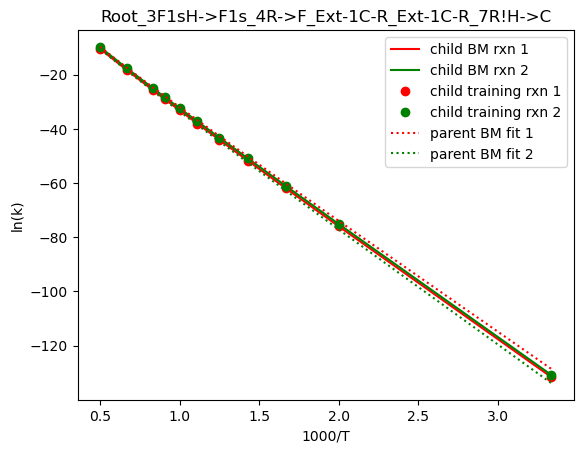

C3F6O + H2O <=> FH + C3HF5O2
C4F8O + H2O <=> FH + C4HF7O2
1.335e-09 m^3/(mol*s) 0.001335 cm^3/(mol*s)


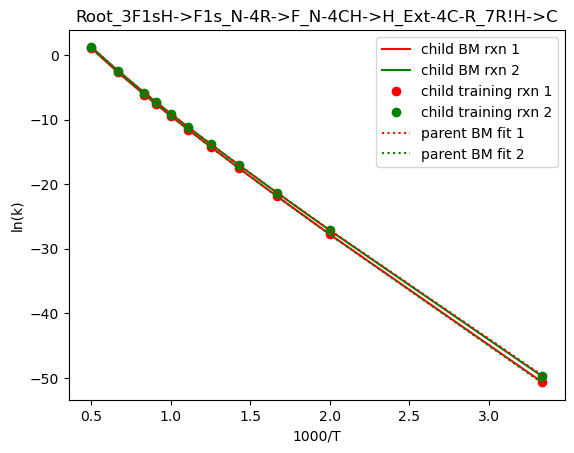

In [28]:
%matplotlib inline
temperatures = [ 300., 500.,  600.,  700. , 800.,  900., 1000., 1100., 1200., 1500., 2000.]
inverse_temps = [1000/T for T in temperatures]



for parent_label, children_labels in parent_to_child.items():
    
    training_rxns = templateRxnMap[parent_label] 
    for tr_rxn in training_rxns:
        print(tr_rxn)
    BM_entries = [family.retrieve_original_entry(label)[0].data for label in children_labels]

    matches = []
    matched_BM = []

    for BM_kinetics in BM_entries:
        for tr_rxn in training_rxns:
            BM_str_of_float = re.search('([1-9]\.?[0-9][0-9])', str(BM_kinetics.A.value_si)).group(1)
            tr_str_of_float = re.search('([1-9]\.?[0-9][0-9])', str(tr_rxn.kinetics.A.value_si)).group(1)
            if BM_str_of_float==tr_str_of_float:
                #print('yeah')
                matches.append((Reaction(reactants=tr_rxn.reactants, products=tr_rxn.products, kinetics = BM_kinetics), tr_rxn))
                matched_BM.append(BM_kinetics)
    if len(matches)==0:
        print("couldn't find any matches")
        continue
        #skipping because the A's are probably very different
        
    #if you miss matching all of them
    if len(matches)==1:
        leftover_tr_rxn = [tr_rxn for tr_rxn in training_rxns if tr_rxn not in matches[0]][0]
        leftover_BM_kinetics = [BM_kinetics for BM_kinetics in BM_entries if BM_kinetics not in matched_BM][0]
        leftover_BM_reaction = Reaction(reactants=leftover_tr_rxn.reactants, products=leftover_tr_rxn.products, kinetics = leftover_BM_kinetics)
        #print(leftover_BM_reaction.kinetics.A, leftover_tr_rxn.kinetics.A)
        matches.append((leftover_BM_reaction, leftover_tr_rxn))

#     for (BM, tr) in matches: 
#         print(str(BM.kinetics.A.value_si), str(tr.kinetics.A.value_si))
        
    child_node_1_BM_rxn, child_training_rxn_1= matches[0] 
    child_node_2_BM_rxn, child_training_rxn_2 = matches[1] 
    
    #empty lists for collecting data
    parent_node_rate_coefficients_1 = []
    parent_node_rate_coefficients_2 = []

    child_node_1_rate_coefficients = []
    child_node_2_rate_coefficients = []

    child_tr_rxn_coeffs_1 = []
    child_tr_rxn_coeffs_2 = []
    
    #let's make the parent BM node
    parent_node, _ = family.retrieve_original_entry(parent_label)
    BM_parent_rxn = Reaction(kinetics = parent_node.data)

    
    #get the dHrxns 
    
    dHrxn_1 = child_node_1_BM_rxn.get_enthalpy_of_reaction(298)
    dHrxn_2 = child_node_2_BM_rxn.get_enthalpy_of_reaction(298)

    
    for temp in temperatures: 
        
        #calculate training rxn rate
        tr_rate_1 = child_training_rxn_1.kinetics.get_rate_coefficient(temp) #J/mol #loaded in as Arr training rxn from templateRxnMap
        tr_rate_2 =child_training_rxn_2.kinetics.get_rate_coefficient(temp) #J/mol #loaded in as Arr training rxn from templateRxnMap

        child_tr_rxn_coeffs_1.append(tr_rate_1)
        child_tr_rxn_coeffs_2.append(tr_rate_2)
        
        #calculate BM child rates
        BM_child_rate_1 = child_node_1_BM_rxn.kinetics.get_rate_coefficient(temp, dHrxn=dHrxn_1) #loaded in as BM kinetics 
        BM_child_rate_2 = child_node_2_BM_rxn.kinetics.get_rate_coefficient(temp, dHrxn=dHrxn_2) #loaded in as BM kinetics 

        child_node_1_rate_coefficients.append(BM_child_rate_1)
        child_node_2_rate_coefficients.append(BM_child_rate_2)
        
        #calculate BM for parent node at both dHrxns for child rxns
        BM_parent_node_rate_dH1 = BM_parent_rxn.kinetics.get_rate_coefficient(temp, dHrxn=dHrxn_1)
        parent_node_rate_coefficients_1.append(BM_parent_node_rate_dH1)
        BM_parent_node_rate_dH2 = BM_parent_rxn.kinetics.get_rate_coefficient(temp, dHrxn=dHrxn_2)
        parent_node_rate_coefficients_2.append(BM_parent_node_rate_dH2)
        
    
    #get lnks

    parent_node_1 = [np.log(rate) for rate in parent_node_rate_coefficients_1]
    parent_node_2 = [np.log(rate) for rate in parent_node_rate_coefficients_2]
    child_node_1 = [np.log(rate) for rate in child_node_1_rate_coefficients]  
    child_node_2 = [np.log(rate) for rate in child_node_2_rate_coefficients]
    child_tr_1 = [np.log(rate) for rate in child_tr_rxn_coeffs_1]
    child_tr_2 = [np.log(rate) for rate in child_tr_rxn_coeffs_2]


    print(child_node_1_BM_rxn.kinetics.A, child_training_rxn_1.kinetics.A)
    #plotting
    plt.figure()   
    plt.plot(inverse_temps, child_node_1, '-', c= 'r', label = 'child BM rxn 1')
    plt.plot(inverse_temps, child_node_2, '-', c= 'g', label = 'child BM rxn 2')
    plt.plot(inverse_temps, child_tr_1, 'o', c='r', label='child training rxn 1')
    plt.plot(inverse_temps, child_tr_2, 'o', c='g', label='child training rxn 2')
    plt.plot(inverse_temps, parent_node_1, ':', c='r', label = 'parent BM fit 1')   
    plt.plot(inverse_temps, parent_node_2, ':', c='g', label = 'parent BM fit 2')   


    plt.title(parent_label)
    plt.xlabel('1000/T')
    plt.ylabel('ln(k)')
    plt.legend()
    plt.show()

In [ ]:
#n = 4, node with 4 reactions
%matplotlib inline
temperatures = [ 300., 500.,  600.,  700. , 800.,  900., 1000., 1100., 1200., 1500., 2000.]
inverse_temps = [1000/T for T in temperatures]



for parent_label, children_labels in parent_to_child_4.items():
    
    training_rxns = templateRxnMap[parent_label] 
    for tr_rxn in training_rxns:
        print(tr_rxn)
    BM_entries = [family.retrieve_original_entry(label)[0].data for label in children_labels]

    
    matches = []
    matched_BM = []
    matched_tr = []

    for BM_kinetics in BM_entries:
        for tr_rxn in training_rxns:
            BM_str_of_float = re.search('([1-9]\.?[0-9][0-9])', str(BM_kinetics.A.value_si)).group(1)
            tr_str_of_float = re.search('([1-9]\.?[0-9][0-9])', str(tr_rxn.kinetics.A.value_si)).group(1)
            if BM_str_of_float==tr_str_of_float:
                print('yeah')
                matches.append((Reaction(reactants=tr_rxn.reactants, products=tr_rxn.products, kinetics = BM_kinetics), tr_rxn))
                matched_BM.append(BM_kinetics)
                matched_tr.append(tr_rxn)
                
    if len(matches)==0:
        print("couldn't find any matches")
        continue
        #skipping because the A's are probably very different
        
    for (BM, tr) in matches:
        print(BM.kinetics.A.value_si, tr.kinetics.A.value_si)
        
#     if 0<len(matches)<len(training_rxns) and len(BM_entries)==len(training_rxns):
#         leftover_tr_rxns = [tr_rxn for tr_rxn in training_rxns if tr_rxn not in matched_tr]
#         leftover_BM_kinetics = [BM_kinetics for BM_kinetics in BM_entries if BM_kinetics not in matched_BM]
#         for leftover_tr_rxn in leftover_tr_rxns:
#             for leftover_BM_kinetics in leftover_BM_kinetics_:
#                 if re.search('([1-9]\.?[0-9][0-9])', str(leftover_BM_kinetics)).group(1)==re.search('([1-9]\.?[0-9][0-9])', str(leftover_tr_rxn.kinetics.A.value_si)).group(1):
#                     leftover_BM_reaction = Reaction(reactants=leftover_tr_rxn.reactants, products=leftover_tr_rxn.products, kinetics = leftover_BM_kinetics)
#                     print(leftover_BM_reaction.kinetics.A, leftover_tr_rxn.kinetics.A)
#                     matches.append((leftover_BM_reaction, leftover_tr_rxn))

    if len(BM_entries)!=len(matches):
        flag=False
    else:
        flag=True

    child_node_1_BM_rxn, child_training_rxn_1= matches[0] 
    child_node_2_BM_rxn, child_training_rxn_2 = matches[1] 
    child_node_3_BM_rxn, child_training_rxn_3= matches[2]
    if flag==True: 
        child_node_4_BM_rxn, child_training_rxn_4 = matches[3] 
    
    #empty lists for collecting data
    parent_node_rate_coefficients_1 = []
    parent_node_rate_coefficients_2 = []
    parent_node_rate_coefficients_3 = []
    parent_node_rate_coefficients_4 = []

    child_node_1_rate_coefficients = []
    child_node_2_rate_coefficients = []
    child_node_3_rate_coefficients = []
    child_node_4_rate_coefficients = []

    child_tr_rxn_coeffs_1 = []
    child_tr_rxn_coeffs_2 = []
    child_tr_rxn_coeffs_3 = []
    child_tr_rxn_coeffs_4 = []
    
    #let's make the parent BM node
    parent_node, _ = family.retrieve_original_entry(parent_label)
    BM_parent_rxn = Reaction(kinetics = parent_node.data)

    
    #get the dHrxns 
    
    dHrxn_1 = child_node_1_BM_rxn.get_enthalpy_of_reaction(298)
    dHrxn_2 = child_node_2_BM_rxn.get_enthalpy_of_reaction(298)
    dHrxn_3 = child_node_3_BM_rxn.get_enthalpy_of_reaction(298)
    if flag==True: 
        dHrxn_4 = child_node_4_BM_rxn.get_enthalpy_of_reaction(298)

    
    for temp in temperatures: 
        
        #calculate training rxn rate
        tr_rate_1 = child_training_rxn_1.kinetics.get_rate_coefficient(temp) #J/mol #loaded in as Arr training rxn from templateRxnMap
        tr_rate_2 =child_training_rxn_2.kinetics.get_rate_coefficient(temp) #J/mol #loaded in as Arr training rxn from templateRxnMap
        tr_rate_3 = child_training_rxn_3.kinetics.get_rate_coefficient(temp) #J/mol #loaded in as Arr training rxn from templateRxnMap
        if flag==True: 
            tr_rate_4 =child_training_rxn_4.kinetics.get_rate_coefficient(temp) #J/mol #loaded in as Arr training rxn from templateRxnMap

        child_tr_rxn_coeffs_1.append(tr_rate_1)
        child_tr_rxn_coeffs_2.append(tr_rate_2)
        child_tr_rxn_coeffs_3.append(tr_rate_3)
        if flag==True:
            child_tr_rxn_coeffs_4.append(tr_rate_4)
        
        #calculate BM child rates
        BM_child_rate_1 = child_node_1_BM_rxn.kinetics.get_rate_coefficient(temp, dHrxn=dHrxn_1) #loaded in as BM kinetics 
        BM_child_rate_2 = child_node_2_BM_rxn.kinetics.get_rate_coefficient(temp, dHrxn=dHrxn_2) #loaded in as BM kinetics 
        BM_child_rate_3 = child_node_3_BM_rxn.kinetics.get_rate_coefficient(temp, dHrxn=dHrxn_3) #loaded in as BM kinetics 
        if flag==True:
            BM_child_rate_4 = child_node_4_BM_rxn.kinetics.get_rate_coefficient(temp, dHrxn=dHrxn_4) #loaded in as BM kinetics 

        child_node_1_rate_coefficients.append(BM_child_rate_1)
        child_node_2_rate_coefficients.append(BM_child_rate_2)
        child_node_3_rate_coefficients.append(BM_child_rate_3)
        if flag==True:
            child_node_4_rate_coefficients.append(BM_child_rate_4)
        
        #calculate BM for parent node at both dHrxns for child rxns
        BM_parent_node_rate_dH1 = BM_parent_rxn.kinetics.get_rate_coefficient(temp, dHrxn=dHrxn_1)
        parent_node_rate_coefficients_1.append(BM_parent_node_rate_dH1)
        BM_parent_node_rate_dH2 = BM_parent_rxn.kinetics.get_rate_coefficient(temp, dHrxn=dHrxn_2)
        parent_node_rate_coefficients_2.append(BM_parent_node_rate_dH2)
        BM_parent_node_rate_dH3 = BM_parent_rxn.kinetics.get_rate_coefficient(temp, dHrxn=dHrxn_3)
        parent_node_rate_coefficients_3.append(BM_parent_node_rate_dH3)
        if flag==True:
            BM_parent_node_rate_dH4 = BM_parent_rxn.kinetics.get_rate_coefficient(temp, dHrxn=dHrxn_4)
            parent_node_rate_coefficients_4.append(BM_parent_node_rate_dH4)
        
    
    #get lnks

    parent_node_1 = [np.log(rate) for rate in parent_node_rate_coefficients_1]
    parent_node_2 = [np.log(rate) for rate in parent_node_rate_coefficients_2]
    parent_node_3 = [np.log(rate) for rate in parent_node_rate_coefficients_3]
    if flag==True:
        parent_node_4 = [np.log(rate) for rate in parent_node_rate_coefficients_4]
    
    child_node_1 = [np.log(rate) for rate in child_node_1_rate_coefficients]  
    child_node_2 = [np.log(rate) for rate in child_node_2_rate_coefficients]
    child_node_3 = [np.log(rate) for rate in child_node_3_rate_coefficients]  
    if flag==True:
        child_node_4 = [np.log(rate) for rate in child_node_4_rate_coefficients]
    
    child_tr_1 = [np.log(rate) for rate in child_tr_rxn_coeffs_1]
    child_tr_2 = [np.log(rate) for rate in child_tr_rxn_coeffs_2]
    child_tr_3 = [np.log(rate) for rate in child_tr_rxn_coeffs_3]
    if flag==True:
        child_tr_4 = [np.log(rate) for rate in child_tr_rxn_coeffs_4]


    print(child_node_1_BM_rxn.kinetics.A, child_training_rxn_1.kinetics.A)
    #plotting
    plt.figure()   
    plt.plot(inverse_temps, child_node_1, '-', c= 'r', label = 'child BM rxn 1')
    plt.plot(inverse_temps, child_node_2, '-', c= 'g', label = 'child BM rxn 2')
    plt.plot(inverse_temps, child_node_3, '-', c= 'violet', label = 'child BM rxn 3')
    if flag==True:
        plt.plot(inverse_temps, child_node_4, '-', c= 'b', label = 'child BM rxn 4')
    
    plt.plot(inverse_temps, child_tr_1, 'o', c='r', label='child training rxn 1')
    plt.plot(inverse_temps, child_tr_2, 'o', c='g', label='child training rxn 2')
    plt.plot(inverse_temps, child_tr_3, 'o', c='violet', label='child training rxn 3')
    if flag==True:
        plt.plot(inverse_temps, child_tr_4, 'o', c='b', label='child training rxn 4')
    
    plt.plot(inverse_temps, parent_node_1, ':', c='r', label = 'parent BM fit 1')   
    plt.plot(inverse_temps, parent_node_2, ':', c='g', label = 'parent BM fit 2')
    plt.plot(inverse_temps, parent_node_3, ':', c='violet', label = 'parent BM fit 3')   
    if flag==True:
        plt.plot(inverse_temps, parent_node_4, ':', c='b', label = 'parent BM fit 4')


    plt.title(parent_label)
    plt.xlabel('1000/T')
    plt.ylabel('ln(k)')
    plt.legend(loc=(1.1,0.8))
    plt.show()